# Case study analysis: CLEANsmall and CLEANtotal

In [14]:
# Libraries
library(dplyr)
library(xtable)
#install.packages("xlsx")
#library("xlsx")
library(ggplot2)
library(jsonlite)
library(RColorBrewer)
#install.packages("dendextend")
suppressPackageStartupMessages(library(dendextend))
#install.packages("ape")
suppressPackageStartupMessages(library(ape))
library(reshape2)

### 1. Compare CLEANsmall dendrograms from CLEAN article and hybrid clustering

In [7]:
# The original matrix with gene names
CLEANsmall = read.table(file="../data/CLEANsmall.MAT", header=TRUE, sep="\t")
dim(CLEANsmall)

[1] 1422  809

Dataset was clustered using Pearson correlation distance and average linkage with Hybrid Hierarchical Clustering algorithm. 

In the article, they defined 8 clusters in the dataset: 

1. \textcolor{red}{cl1 - Nuclear part, RNA processing (126 genes)}
2. \textcolor{OliveGreen}{cl2 - Mitochondrion (125 genes)}
3. \textcolor{green}{cl3 - Mitosis (73 genes)}
4. \textcolor{Emerald}{cl4 - DNA replication (42 genes)}
5. \textcolor{Purple}{cl5 - Extracellular region, organ development, cell adhesion (126 genes -> purple)}
6. \textcolor{magenta}{cl6 - Extracellular region, organ development, cell adhesion (168 genes -> fuchia)}
7. \textcolor{yellow}{cl7 - Immune response, signal transducer activity, receptor activity, response to stress (288 genes)}
8. \textcolor{cyan}{cl8 - System process, plasma membrane, (G-protein coupled) receptor activity (474 genes)}

In [8]:
cl1 = as.character(CLEANsmall$gene[1:126]) # Nuclear part cluster
cl2 = as.character(CLEANsmall$gene[127:251]) # Mitochondrion cluster
cl3 = as.character(CLEANsmall$gene[252:324]) # Mitosis cluster
cl4 = as.character(CLEANsmall$gene[325:366]) # DNA replication 
cl5 = as.character(CLEANsmall$gene[367:492]) # Extracellular region, organ development, cell adhesion (purple)
cl6 = as.character(CLEANsmall$gene[493:660]) # Extracellular region, organ development, cell adhesion (fuchia)
cl7 = as.character(CLEANsmall$gene[661:948]) # immune response, signal transducer activity, receptor activity, response to stress
cl8 = as.character(CLEANsmall$gene[949:1422]) # system process, G protein coupled receptor activity, plasma membrane

Visualising the 2 dendrograms (CLEAN article data on the left, my clustered on the right) with colors representing clusters from CLEAN article.

In [15]:
MyTree <- read.tree("../data/CLEANsmall_dendrogram.nwk") # my clustered
Original <- read.tree("../data/GSE11121_GSE1456_GSE3494_GSE7390_sigCLEANscoreGenes.nwk") # original
cols = c(rep("red", length(cl1)), rep("#CCCC00", length(cl2)), rep("green", length(cl3)), rep("darkgreen", length(cl4)), rep("purple", length(cl5)), rep("#FF00FF", length(cl6)), rep("#FEC34D", length(cl7)), rep("#3399FF", length(cl8)))

d1 = as.dendrogram(Original)
d2 = as.dendrogram(MyTree)
pdf("CLEANsmall_Fig3.pdf")
tanglegram(d1, d2, sort=T, highlight_distinct_edges = FALSE, color_lines = rev(cols), lwd=0.5, highlight_branches_lwd = FALSE, main_left="CLEAN", main_right="VisHiC2", edge.lwd=0.1, faster=TRUE, cex_sub=1, cex_main_left=1, cex_main_right=1, lab.cex=0.009,  margin_inner = 1, margin_outer=1)
dev.off()

pdf 
  2

### 2. Analyse dense clusters

In [39]:
# annotation data from g:ProfileR of GO
load("../data/CLEANsmall_gp.RData") # gp.small
load("../data/CLEANtot_gp.RData") # gp.tot

In [40]:
# Filter out terms bigger than 700
gp.small.filt = gp.small[gp.small$term.size<=700,]
gp.tot.filt = gp.tot[gp.tot$term.size<=700,]

#### CLEANsmall

In [23]:
# Dense nodes
# With filtering
# First annotated clusters
first.sm.filt = "NODE_5 NODE_6 NODE_1"
first.sm.filt = strsplit(first.sm.filt, " ")[[1]]

# Best p-value clusters
best.sm.filt = "NODE_56 NODE_267 NODE_26 NODE_45 NODE_183 NODE_34 NODE_226 NODE_377 NODE_524 NODE_23 NODE_229 NODE_25"
best.sm.filt = strsplit(best.sm.filt, " ")[[1]]

# F1 clusters
F1.sm.filt = "NODE_282 NODE_183 NODE_676 NODE_226 NODE_621 NODE_857 NODE_982 NODE_653 NODE_518 NODE_979 NODE_783 NODE_1070 NODE_23 NODE_378 NODE_680 NODE_379 NODE_506 NODE_616 NODE_1178 NODE_960 NODE_1289 NODE_1047 NODE_76 NODE_774 NODE_604 NODE_759 NODE_395 NODE_1371 NODE_767 NODE_397 NODE_720 NODE_342 NODE_158 NODE_276 NODE_878 NODE_62 NODE_1053 NODE_511 NODE_459 NODE_1256 NODE_744 NODE_1411 NODE_1009 NODE_400 NODE_470 NODE_967 NODE_970 NODE_768 NODE_749 NODE_466 NODE_1239 NODE_308 NODE_25 NODE_151 NODE_1389 NODE_706 NODE_712"
F1.sm.filt = strsplit(F1.sm.filt, " ")[[1]]

In [24]:
# Dense nodes
# Without filtering
# First annotated clusters
first.sm = "NODE_5 NODE_6 NODE_1"
first.sm = strsplit(first.sm, " ")[[1]]

# Best p-value clusters
best.sm = "NODE_5 NODE_8 NODE_305 NODE_117 NODE_63 NODE_7 NODE_23 NODE_207 NODE_62 NODE_25 NODE_308 NODE_254"
best.sm = strsplit(best.sm, " ")[[1]]

# F1 clusters
F1.sm = "NODE_282 NODE_183 NODE_676 NODE_226 NODE_621 NODE_857 NODE_982 NODE_653 NODE_518 NODE_979 NODE_783 NODE_23 NODE_1070 NODE_378 NODE_680 NODE_379 NODE_506 NODE_616 NODE_1178 NODE_960 NODE_1289 NODE_1047 NODE_76 NODE_774 NODE_604 NODE_759 NODE_395 NODE_767 NODE_1371 NODE_397 NODE_720 NODE_342 NODE_158 NODE_276 NODE_878 NODE_62 NODE_1053 NODE_511 NODE_459 NODE_1256 NODE_744 NODE_1411 NODE_1009 NODE_400 NODE_470 NODE_967 NODE_970 NODE_768 NODE_749 NODE_466 NODE_1239 NODE_308 NODE_25 NODE_151 NODE_1389 NODE_712 NODE_739 NODE_1157 NODE_1314 NODE_1153 NODE_675 NODE_1087 NODE_477 NODE_254 NODE_517"
F1.sm = strsplit(F1.sm, " ")[[1]]

#### CLEANtotal

In [42]:
# Dense nodes
# Without filtering
# First annotated clusters
first.tot = "NODE_12306 NODE_225 NODE_682 NODE_143 NODE_13 NODE_883 NODE_4 NODE_328 NODE_681 NODE_5 NODE_400 NODE_115 NODE_17 NODE_327 NODE_882 NODE_3894 NODE_10703 NODE_224 NODE_192 NODE_2908 NODE_870 NODE_187 NODE_37 NODE_12181 NODE_7005 NODE_11763 NODE_29 NODE_524 NODE_10042 NODE_10621 NODE_12041 NODE_10156 NODE_4232 NODE_12153 NODE_8353 NODE_6319 NODE_3893 NODE_11251 NODE_10999 NODE_7324 NODE_10508 NODE_880 NODE_5665 NODE_7604 NODE_11751 NODE_11452 NODE_11801 NODE_285 NODE_9154 NODE_11679 NODE_10998 NODE_11367 NODE_12167 NODE_9814 NODE_6987 NODE_11653 NODE_11121 NODE_8337 NODE_12245"
first.tot = strsplit(first.tot, " ")[[1]]

# Best p-value clusters
best.tot = "NODE_2111 NODE_9948 NODE_2825 NODE_3309 NODE_9641 NODE_12352 NODE_143 NODE_328 NODE_1900 NODE_7324 NODE_1093 NODE_177 NODE_751 NODE_1523 NODE_1623 NODE_1061 NODE_7652 NODE_887 NODE_3316 NODE_11810 NODE_6640 NODE_10940 NODE_312 NODE_441 NODE_10741 NODE_4486 NODE_3029 NODE_4103 NODE_6099 NODE_1212 NODE_9351 NODE_8157 NODE_3957 NODE_10553 NODE_2460 NODE_10621 NODE_543 NODE_1726 NODE_866 NODE_948 NODE_4143 NODE_136 NODE_285 NODE_12041 NODE_11879 NODE_718 NODE_3905 NODE_9230 NODE_10159 NODE_110 NODE_6997 NODE_2309 NODE_8141 NODE_1926 NODE_8756 NODE_8625 NODE_11860 NODE_2270 NODE_12245 NODE_101 NODE_671 NODE_4584 NODE_8346 NODE_6407 NODE_1529 NODE_9870 NODE_890 NODE_12237 NODE_8544 NODE_2590 NODE_3916 NODE_447 NODE_540 NODE_11119 NODE_12230 NODE_3359 NODE_1671 NODE_6093 NODE_10322 NODE_1989 NODE_11679 NODE_2153 NODE_5425 NODE_9330 NODE_10998 NODE_8629 NODE_6987 NODE_480 NODE_4232 NODE_1272 NODE_11290 NODE_1055 NODE_826 NODE_8557 NODE_3898 NODE_11367 NODE_8135 NODE_8628 NODE_153 NODE_825 NODE_828 NODE_11473 NODE_233 NODE_11801 NODE_3077 NODE_12183 NODE_1089 NODE_7992 NODE_1111 NODE_1808 NODE_5436 NODE_167 NODE_3696 NODE_8568 NODE_878 NODE_1080 NODE_803 NODE_5665 NODE_997 NODE_789 NODE_6685 NODE_1241 NODE_270 NODE_264 NODE_11653 NODE_1833 NODE_1351 NODE_7886 NODE_1017 NODE_11121 NODE_5348 NODE_7632 NODE_10841 NODE_8337 NODE_9814 NODE_3577"
best.tot = strsplit(best.tot, " ")[[1]]

# F1 clusters
F1.tot = "NODE_7467 NODE_9951 NODE_9419 NODE_8611 NODE_11543 NODE_9814 NODE_3577 NODE_11254 NODE_8540 NODE_3367 NODE_9552 NODE_8895 NODE_11522 NODE_8400 NODE_10181 NODE_11810 NODE_9068 NODE_4216 NODE_12983 NODE_8791 NODE_1322 NODE_6450 NODE_4449 NODE_10286 NODE_10114 NODE_4486 NODE_718 NODE_7982 NODE_9959 NODE_3227 NODE_2625 NODE_5757 NODE_8313 NODE_3819 NODE_5839 NODE_8625 NODE_8021 NODE_11860 NODE_8988 NODE_9010 NODE_11008 NODE_3957 NODE_8053 NODE_11011 NODE_2950 NODE_9563 NODE_11056 NODE_3071 NODE_4584 NODE_7123 NODE_12398 NODE_8821 NODE_11893 NODE_4885 NODE_8493 NODE_4831 NODE_1465 NODE_12826 NODE_6407 NODE_10066 NODE_2590 NODE_1452 NODE_2460 NODE_7324 NODE_3629 NODE_1671 NODE_6110 NODE_11950 NODE_5341 NODE_5032 NODE_11119 NODE_10347 NODE_12237 NODE_8544 NODE_4355 NODE_11873 NODE_9645 NODE_2153 NODE_540 NODE_8495 NODE_6051 NODE_4143 NODE_3288 NODE_10305 NODE_8168 NODE_3111 NODE_13141 NODE_10010 NODE_10248 NODE_5425 NODE_9330 NODE_3324 NODE_8018 NODE_12355 NODE_5253 NODE_12059 NODE_3466 NODE_9063 NODE_11290 NODE_1272 NODE_7173 NODE_3359 NODE_285 NODE_13336 NODE_1954 NODE_4267 NODE_8737 NODE_5006 NODE_7718 NODE_543 NODE_1623 NODE_10549 NODE_4260 NODE_3287 NODE_9937 NODE_6213 NODE_6141 NODE_7920 NODE_11141 NODE_1395 NODE_7992 NODE_9934 NODE_5751 NODE_7041 NODE_6599 NODE_6951 NODE_5727 NODE_5548 NODE_153 NODE_12547 NODE_3374 NODE_480 NODE_9230 NODE_13014 NODE_8114 NODE_13200 NODE_11367 NODE_11608 NODE_4668 NODE_8568 NODE_11839 NODE_5665 NODE_12598 NODE_8658 NODE_11226 NODE_7241 NODE_12267 NODE_233 NODE_10187 NODE_6547 NODE_10178 NODE_10341 NODE_1909 NODE_3820 NODE_4122 NODE_11237 NODE_11530 NODE_167 NODE_10609 NODE_5828 NODE_3645 NODE_4181 NODE_12543 NODE_1782 NODE_9783 NODE_4232 NODE_1529 NODE_4327 NODE_2280 NODE_6036 NODE_789 NODE_1048 NODE_1351 NODE_12550 NODE_4590 NODE_2377 NODE_8629 NODE_4499 NODE_890 NODE_4883 NODE_10841 NODE_6371 NODE_997 NODE_10290 NODE_3356 NODE_13258 NODE_6319 NODE_12845 NODE_12919 NODE_5713 NODE_3696 NODE_5212 NODE_3927 NODE_6159 NODE_10238 NODE_2994 NODE_671 NODE_9351 NODE_137 NODE_12764 NODE_10402 NODE_3136 NODE_8206 NODE_11836 NODE_9438 NODE_9888 NODE_10811 NODE_6640 NODE_4118 NODE_4715 NODE_1194 NODE_4682 NODE_12375 NODE_7499 NODE_8011 NODE_8628 NODE_5348 NODE_3387 NODE_11106 NODE_8082 NODE_10526 NODE_3610 NODE_10783 NODE_10880 NODE_10244 NODE_8557 NODE_1241 NODE_4430 NODE_264 NODE_9274 NODE_101 NODE_4083 NODE_5893 NODE_828 NODE_4431 NODE_13263 NODE_3730 NODE_2105 NODE_11704 NODE_4409 NODE_1464 NODE_6234 NODE_9647 NODE_10672 NODE_2435 NODE_2733 NODE_6546 NODE_1926 NODE_2616 NODE_9278 NODE_11653 NODE_12245 NODE_13045 NODE_9851 NODE_7378 NODE_5484 NODE_6131 NODE_13165 NODE_6936 NODE_9420 NODE_10536 NODE_1089 NODE_6723 NODE_6379 NODE_6685 NODE_10998 NODE_9440 NODE_2406 NODE_4743 NODE_6059 NODE_8800 NODE_1080 NODE_6249 NODE_7886 NODE_7823 NODE_12468 NODE_6206 NODE_1808 NODE_1354 NODE_5462 NODE_11473 NODE_6987 NODE_10741 NODE_11801 NODE_5608 NODE_13011 NODE_8337 NODE_1799 NODE_447 NODE_422 NODE_4432 NODE_981 NODE_4153 NODE_878 NODE_8157 NODE_3635 NODE_12183 NODE_7632 NODE_2096 NODE_11807 NODE_6358 NODE_4373 NODE_12868 NODE_1788 NODE_2793 NODE_1017 NODE_1989 NODE_5281 NODE_11679 NODE_4196 NODE_5436 NODE_4058 NODE_4681 NODE_3366 NODE_5124 NODE_1718 NODE_2888 NODE_1833 NODE_2202 NODE_8169 NODE_6461 NODE_3923 NODE_11121 NODE_2071 NODE_8739 NODE_1145 NODE_826 NODE_3581 NODE_825 NODE_3905 NODE_2354 NODE_2891 NODE_10782 NODE_7906 NODE_585 NODE_2722 NODE_1574 NODE_978 NODE_3654 NODE_898 NODE_10229 NODE_8118 NODE_178 NODE_5603 NODE_4512 NODE_5847 NODE_6194 NODE_7120 NODE_12915 NODE_647 NODE_1422 NODE_1163 NODE_803 NODE_10486"
F1.tot = strsplit(F1.tot, " ")[[1]]

In [43]:
# Dense nodes
# With filtering
# First annotated clusters
first.tot.filt = "NODE_12306 NODE_225 NODE_682 NODE_143 NODE_13 NODE_883 NODE_681 NODE_328 NODE_5 NODE_115 NODE_17 NODE_22 NODE_690 NODE_327 NODE_882 NODE_10703 NODE_224 NODE_192 NODE_2908 NODE_870 NODE_21 NODE_10707 NODE_1083 NODE_37 NODE_12181 NODE_11763 NODE_29 NODE_524 NODE_10042 NODE_10621 NODE_12041 NODE_10156 NODE_4232 NODE_8353 NODE_12153 NODE_6319 NODE_11251 NODE_3893 NODE_10999 NODE_7324 NODE_10508 NODE_880 NODE_5665 NODE_3835 NODE_7604 NODE_11751 NODE_671 NODE_11452 NODE_11801 NODE_285 NODE_9154 NODE_8739 NODE_11679 NODE_8545 NODE_10998 NODE_11367 NODE_8544 NODE_2202 NODE_12167 NODE_8337 NODE_9814 NODE_6987 NODE_11121 NODE_11653 NODE_12245 NODE_1080"
first.tot.filt = strsplit(first.tot.filt, " ")[[1]]

# Best p-value clusters
best.tot.filt = "NODE_10236 NODE_3309 NODE_7794 NODE_9641 NODE_2111 NODE_12390 NODE_7324 NODE_1093 NODE_2874 NODE_940 NODE_592 NODE_780 NODE_1623 NODE_443 NODE_7652 NODE_1197 NODE_887 NODE_11810 NODE_6640 NODE_2984 NODE_10940 NODE_312 NODE_10741 NODE_4486 NODE_4216 NODE_4103 NODE_8313 NODE_9351 NODE_10553 NODE_2460 NODE_10621 NODE_543 NODE_3029 NODE_866 NODE_9709 NODE_4143 NODE_285 NODE_12041 NODE_3476 NODE_7982 NODE_718 NODE_11950 NODE_3227 NODE_9230 NODE_1212 NODE_110 NODE_2845 NODE_3329 NODE_6997 NODE_5757 NODE_2309 NODE_1926 NODE_8756 NODE_11860 NODE_8625 NODE_2270 NODE_12245 NODE_101 NODE_671 NODE_12398 NODE_4584 NODE_6407 NODE_1529 NODE_3815 NODE_9870 NODE_890 NODE_12237 NODE_8544 NODE_2590 NODE_3916 NODE_447 NODE_540 NODE_8763 NODE_11119 NODE_12230 NODE_3359 NODE_1671 NODE_6093 NODE_10322 NODE_1989 NODE_5548 NODE_11679 NODE_2153 NODE_7241 NODE_444 NODE_3324 NODE_9330 NODE_5425 NODE_2143 NODE_4028 NODE_10998 NODE_5943 NODE_3466 NODE_8629 NODE_2377 NODE_6987 NODE_8737 NODE_8114 NODE_480 NODE_4232 NODE_7173 NODE_1272 NODE_11290 NODE_826 NODE_8557 NODE_3898 NODE_2668 NODE_422 NODE_11367 NODE_8135 NODE_4681 NODE_8628 NODE_12375 NODE_981 NODE_153 NODE_4196 NODE_828 NODE_11473 NODE_6951 NODE_233 NODE_1395 NODE_11801 NODE_12183 NODE_1089 NODE_7992 NODE_8739 NODE_1808 NODE_5436 NODE_4682 NODE_1194 NODE_167 NODE_3326 NODE_4526 NODE_3696 NODE_11211 NODE_8568 NODE_878 NODE_1080 NODE_5665 NODE_997 NODE_789 NODE_2096 NODE_6685 NODE_1718 NODE_1241 NODE_1788 NODE_264 NODE_11653 NODE_2202 NODE_2891 NODE_1530 NODE_1351 NODE_3366 NODE_2888 NODE_7886 NODE_1017 NODE_1909 NODE_11121 NODE_5281 NODE_5348 NODE_7632 NODE_10841 NODE_8337 NODE_3906 NODE_8895 NODE_9814 NODE_11254 NODE_3367"
best.tot.filt = strsplit(best.tot.filt, " ")[[1]]

# F1 clusters
F1.tot.filt = "NODE_7467 NODE_9876 NODE_9419 NODE_8611 NODE_3906 NODE_8895 NODE_9814 NODE_11254 NODE_9552 NODE_3367 NODE_8540 NODE_11497 NODE_11522 NODE_8400 NODE_9068 NODE_11810 NODE_10181 NODE_4216 NODE_12983 NODE_8791 NODE_10286 NODE_6450 NODE_1322 NODE_4449 NODE_4486 NODE_10114 NODE_7982 NODE_718 NODE_9959 NODE_3227 NODE_2625 NODE_5757 NODE_8313 NODE_5839 NODE_3819 NODE_11860 NODE_8021 NODE_8625 NODE_8988 NODE_9010 NODE_11008 NODE_3957 NODE_8053 NODE_11011 NODE_11056 NODE_2950 NODE_3071 NODE_9563 NODE_7123 NODE_12398 NODE_4584 NODE_8821 NODE_11893 NODE_4831 NODE_4885 NODE_10066 NODE_8493 NODE_2590 NODE_6407 NODE_1465 NODE_12826 NODE_1452 NODE_2460 NODE_7324 NODE_1671 NODE_11950 NODE_3629 NODE_6110 NODE_5032 NODE_5341 NODE_11119 NODE_12237 NODE_8544 NODE_4355 NODE_10347 NODE_11873 NODE_9645 NODE_2153 NODE_8495 NODE_6051 NODE_540 NODE_4143 NODE_3288 NODE_10305 NODE_8168 NODE_3111 NODE_13141 NODE_10010 NODE_10248 NODE_3324 NODE_9330 NODE_5425 NODE_8018 NODE_9063 NODE_5253 NODE_3466 NODE_12059 NODE_12355 NODE_3359 NODE_11290 NODE_7173 NODE_1272 NODE_285 NODE_13336 NODE_8737 NODE_4267 NODE_1954 NODE_5006 NODE_7718 NODE_543 NODE_1623 NODE_10549 NODE_3287 NODE_4260 NODE_6213 NODE_6141 NODE_9937 NODE_8564 NODE_11141 NODE_1395 NODE_7992 NODE_9934 NODE_5751 NODE_7041 NODE_6599 NODE_6951 NODE_5727 NODE_5548 NODE_153 NODE_12547 NODE_3374 NODE_13014 NODE_8114 NODE_480 NODE_9230 NODE_13200 NODE_11367 NODE_4668 NODE_11608 NODE_8568 NODE_11839 NODE_5665 NODE_12598 NODE_8658 NODE_11226 NODE_12267 NODE_7241 NODE_233 NODE_10187 NODE_6547 NODE_10341 NODE_10178 NODE_1909 NODE_4468 NODE_3820 NODE_11237 NODE_11506 NODE_167 NODE_5828 NODE_3645 NODE_10609 NODE_4181 NODE_12543 NODE_9783 NODE_1782 NODE_4232 NODE_4327 NODE_1529 NODE_2280 NODE_6036 NODE_789 NODE_1351 NODE_1048 NODE_12550 NODE_4590 NODE_8629 NODE_2377 NODE_4499 NODE_890 NODE_4883 NODE_10841 NODE_6371 NODE_997 NODE_10290 NODE_12845 NODE_6319 NODE_13258 NODE_3356 NODE_12919 NODE_5713 NODE_5212 NODE_6159 NODE_3696 NODE_3927 NODE_2994 NODE_10238 NODE_671 NODE_9351 NODE_137 NODE_12764 NODE_10402 NODE_3136 NODE_8206 NODE_11836 NODE_9438 NODE_9888 NODE_10811 NODE_6640 NODE_4118 NODE_4715 NODE_4682 NODE_1194 NODE_12375 NODE_7499 NODE_8011 NODE_8628 NODE_5348 NODE_3387 NODE_11106 NODE_8082 NODE_10526 NODE_3610 NODE_10783 NODE_10880 NODE_10244 NODE_8557 NODE_1241 NODE_4430 NODE_264 NODE_9274 NODE_101 NODE_4083 NODE_5893 NODE_828 NODE_4431 NODE_13263 NODE_3730 NODE_2105 NODE_11704 NODE_4409 NODE_1464 NODE_6234 NODE_9647 NODE_10672 NODE_2435 NODE_2733 NODE_6546 NODE_1926 NODE_2616 NODE_9278 NODE_11653 NODE_12245 NODE_13045 NODE_9851 NODE_7378 NODE_5484 NODE_6131 NODE_13165 NODE_6936 NODE_10536 NODE_9420 NODE_1089 NODE_6379 NODE_6723 NODE_6685 NODE_10998 NODE_9440 NODE_2406 NODE_4743 NODE_6059 NODE_8800 NODE_1080 NODE_6249 NODE_7886 NODE_7823 NODE_12468 NODE_6206 NODE_1808 NODE_1354 NODE_5462 NODE_11473 NODE_6987 NODE_10741 NODE_11801 NODE_5608 NODE_13011 NODE_8337 NODE_1799 NODE_447 NODE_422 NODE_4432 NODE_981 NODE_4153 NODE_878 NODE_12183 NODE_8157 NODE_3635 NODE_7632 NODE_2096 NODE_11807 NODE_6358 NODE_4373 NODE_12868 NODE_1788 NODE_1017 NODE_1989 NODE_5281 NODE_11679 NODE_4196 NODE_5436 NODE_4681 NODE_2888 NODE_3366 NODE_1530 NODE_5124 NODE_8169 NODE_2202 NODE_1718 NODE_6461 NODE_3923 NODE_11121 NODE_2071 NODE_8739 NODE_826 NODE_3581 NODE_2891 NODE_10782"
F1.tot.filt = strsplit(F1.tot.filt, " ")[[1]]

In [25]:
gp.small.filt %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% first.sm.filt) %>% mutate(method="First annotation(filtered)") -> first.sm.filt.res

gp.small.filt %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>%
  group_by(query.number) %>% 
  filter(query.number %in% best.sm.filt) %>% mutate(method="Best annotation(filtered)") -> best.sm.filt.res

gp.small.filt %>% dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% F1.sm.filt) %>% mutate(method="F1 annotation(filtered)") -> F1.sm.filt.res

# Without filtering
gp.small %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% first.sm) %>% mutate(method="First annotation") -> first.sm.res

gp.small %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>%
  group_by(query.number) %>% 
  filter(query.number %in% best.sm) %>% mutate(method="Best annotation") -> best.sm.res

gp.small %>% dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% F1.sm) %>% mutate(method="F1 annotation") -> F1.sm.res
stats <- rbind(first.sm.filt.res, best.sm.filt.res, F1.sm.filt.res, first.sm.res, best.sm.res, F1.sm.res)

In [44]:
gp.tot.filt %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% first.tot.filt) %>% mutate(method="First annotation(filtered)") -> first.tot.filt.res

gp.tot.filt %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>%
  group_by(query.number) %>% 
  filter(query.number %in% best.tot.filt) %>% mutate(method="Best annotation(filtered)") -> best.tot.filt.res

gp.tot.filt %>% dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% F1.tot.filt) %>% mutate(method="F1 annotation(filtered)") -> F1.tot.filt.res

# Without filtering
gp.tot %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% first.tot) %>% mutate(method="First annotation") -> first.tot.res

gp.tot %>% 
  dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>%
  group_by(query.number) %>% 
  filter(query.number %in% best.tot) %>% mutate(method="Best annotation") -> best.tot.res

gp.tot %>% dplyr::select(query.number, term.id, term.name, domain, p.value, log10, F1, term.size, overlap.size, query.size, size) %>% group_by(query.number) %>% filter(query.number %in% F1.tot) %>% mutate(method="F1 annotation") -> F1.tot.res
stats.tot <- rbind(first.tot.filt.res, best.tot.filt.res, F1.tot.filt.res, first.tot.res, best.tot.res, F1.tot.res)

#### CLEANsmall dense cluster sizes and term sizes

Saving 178 x 178 mm image


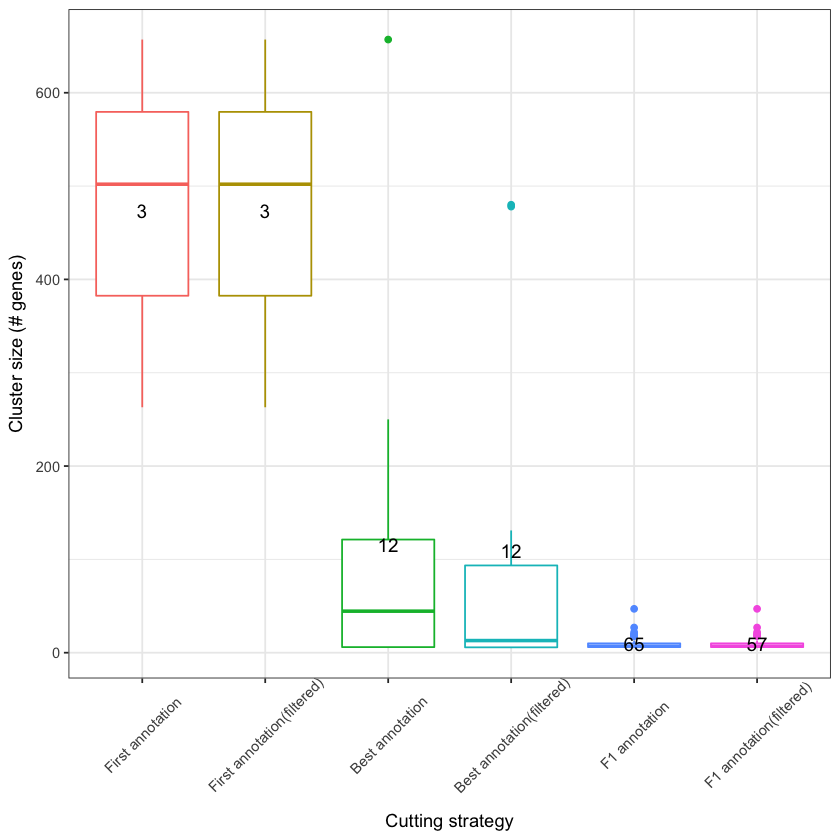

In [30]:
stats %>% select(query.number, method, size) %>% group_by(method) %>% unique() -> cl.sizes
cl.sizes$method = as.factor(cl.sizes$method)
cl.sizes$method = factor(cl.sizes$method, levels=levels(cl.sizes$method)[c(5,6,1,2,3,4)])
give.n <- function(x){
   return(c(y = mean(x), label = length(x)))
}

ggplot(cl.sizes, aes(y=size, x=method, col=method)) + geom_boxplot() + theme_bw() + xlab("Cutting strategy") + ylab("Cluster size (# genes)") + stat_summary(fun.data = give.n, geom = "text", col="black", size=4) + theme(legend.position="none") + theme(axis.text.x = element_text(angle=45, hjust=0.5, vjust=0.6))
ggsave("CLEANsmall_cl_sizes_Fig5.pdf", dpi=600, units="mm", width=178)

Saving 178 x 178 mm image


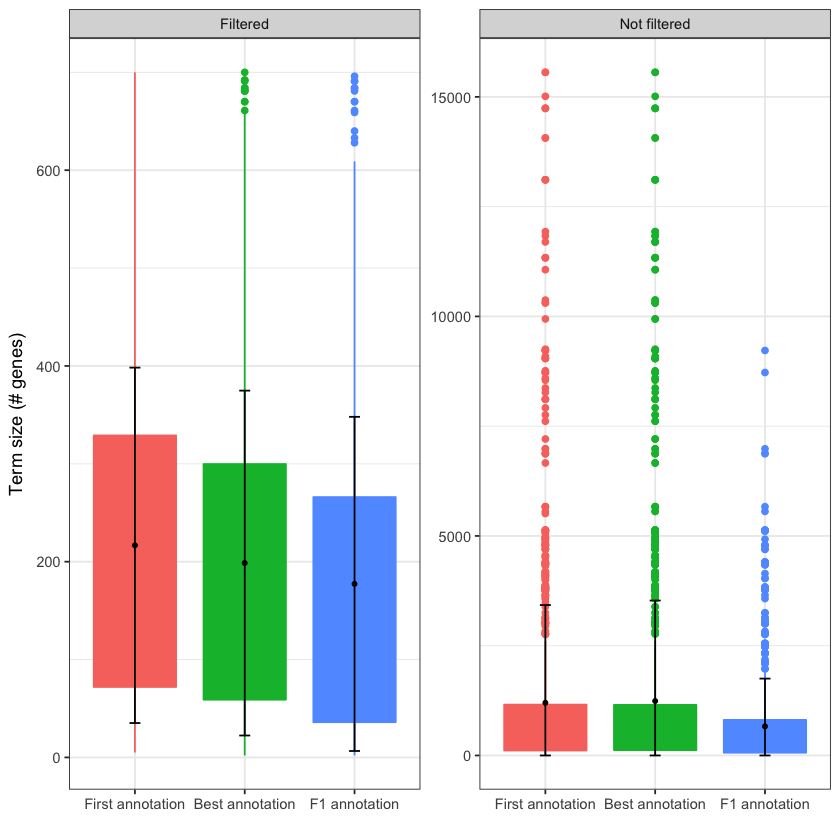

In [33]:
# Term sizes
stats %>% select(query.number,method, term.size) %>% group_by(method) -> term.sizes
#term.sizes$method = as.factor(term.sizes$method)
#term.sizes$method = factor(term.sizes$method, levels=levels(term.sizes$method)[c(5,6,1,2,3,4)])

term.sizes$group <- unlist(lapply(term.sizes$method, function(x) ifelse(length(grep("filtered",x))>0,"Filtered","Not filtered")))
term.sizes$method <- gsub("\\(.*\\)", "",as.character(term.sizes$method))

term.sizes$method = as.factor(term.sizes$method)
term.sizes$method = factor(term.sizes$method, levels=levels(term.sizes$method)[c(3,1,2)])
data_summary <- function(x) {
   mu <- mean(x)
   sigma1 <- max(0,mu-sd(x))
   sigma2 <- mu+sd(x)
   return(c(y=mu,ymin=sigma1,ymax=sigma2))
}
ggplot(term.sizes, aes(x=method, y=term.size,fill=method, col=method)) + geom_boxplot() + facet_wrap(~group, scale="free_y") + theme_bw() + xlab(" ") + ylab("Term size (# genes)") + stat_summary(fun.data = data_summary,geom="errorbar", col="black", width=0.1) + stat_summary(fun.y = "mean",col="black", size=1,geom = "point") + theme(legend.position="none")
ggsave("CLEANsmall_term_sizes_Fig6.pdf", dpi=600, units="mm", width=178)

#### CLEANsmall unique functions

In [36]:
stats %>% group_by(method) %>% distinct(query.number, size, method) %>% mutate(nr_clusters = length(unique(query.number)), min_size = min(size), mean_size = round(mean(size),2), max_size=max(size)) %>% select(method, nr_clusters, min_size, mean_size, max_size) %>% unique() -> uniq.sm

stats %>% group_by(method) %>% dplyr::summarise(nr_annotations=length(term.id)) -> nr_terms
stats %>% group_by(method, term.id) %>% dplyr::summarise(count=n()) %>% filter(count==1) %>% group_by(method) %>% dplyr::summarise(uniq_annotations = n()) -> uniq_terms
uniq.sm = merge(uniq.sm, nr_terms, by="method")
uniq.sm = merge(uniq.sm, uniq_terms, by="method")
uniq.sm[["prop"]] = round(uniq.sm$uniq_annotations/uniq.sm$nr_annotations,2)
head(uniq.sm)

method,nr_clusters,min_size,mean_size,max_size,nr_annotations,uniq_annotations,prop
Best annotation,12,5,115.75,657,1495,649,0.43
Best annotation(filtered),12,5,108.75,480,926,718,0.78
F1 annotation,65,5,9.60,47,1028,523,0.51
F1 annotation(filtered),57,5,9.49,47,753,476,0.63
First annotation,3,263,474.00,657,1272,850,0.67
First annotation(filtered),3,263,474.00,657,832,688,0.83


Saving 178 x 178 mm image


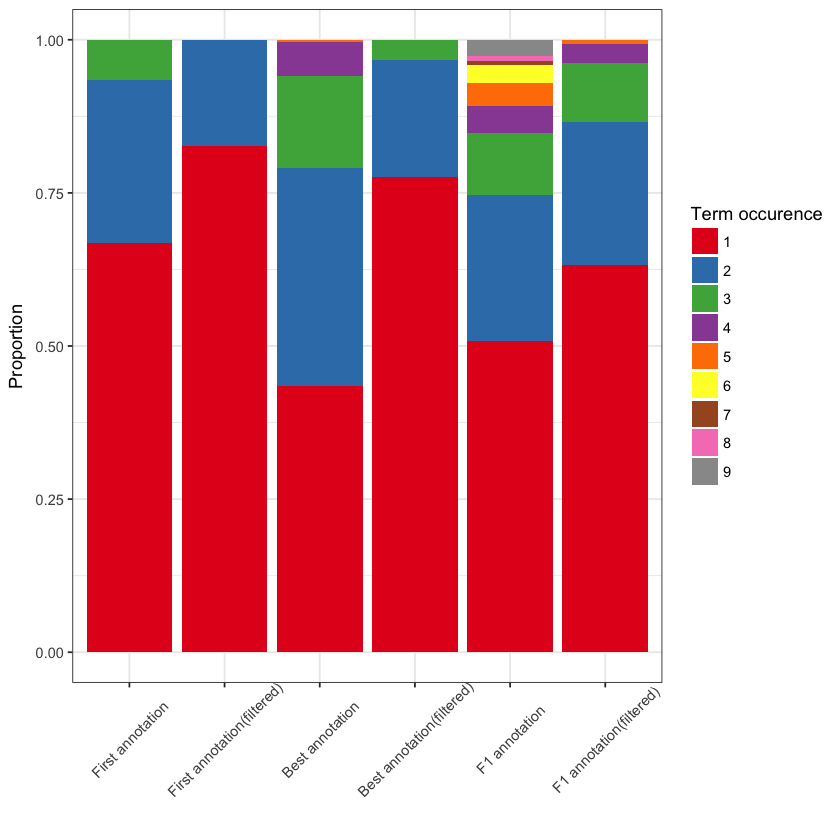

In [38]:
stats %>% group_by(method, term.id) %>% dplyr::mutate(n=n()) %>% group_by(method, n) %>% dplyr::summarise(count = n()) -> count.sm
count.sm %>% group_by(method) %>% dplyr::mutate(prop=count/sum(count)) -> count.sm
count.sm$method = as.factor(count.sm$method)
count.sm$method = factor(count.sm$method, levels=levels(count.sm$method)[c(5,6,1,2,3,4)])

ggplot(count.sm, aes(x = method, y = prop, fill = as.factor(n))) + geom_bar(position = position_fill(reverse = TRUE), stat = 'identity') + theme_bw() + theme(axis.text.x = element_text(angle=45, hjust=0.5, vjust=0.6)) + ylab("Proportion") +xlab(" ") + scale_fill_manual(name="Term occurence", values=brewer.pal(9, "Set1"))

ggsave("CLEANsmall_unique_Fig11.pdf", dpi=600, units="mm", width=178)

#### CLEANtotal dense cluster sizes and term sizes

Saving 178 x 178 mm image


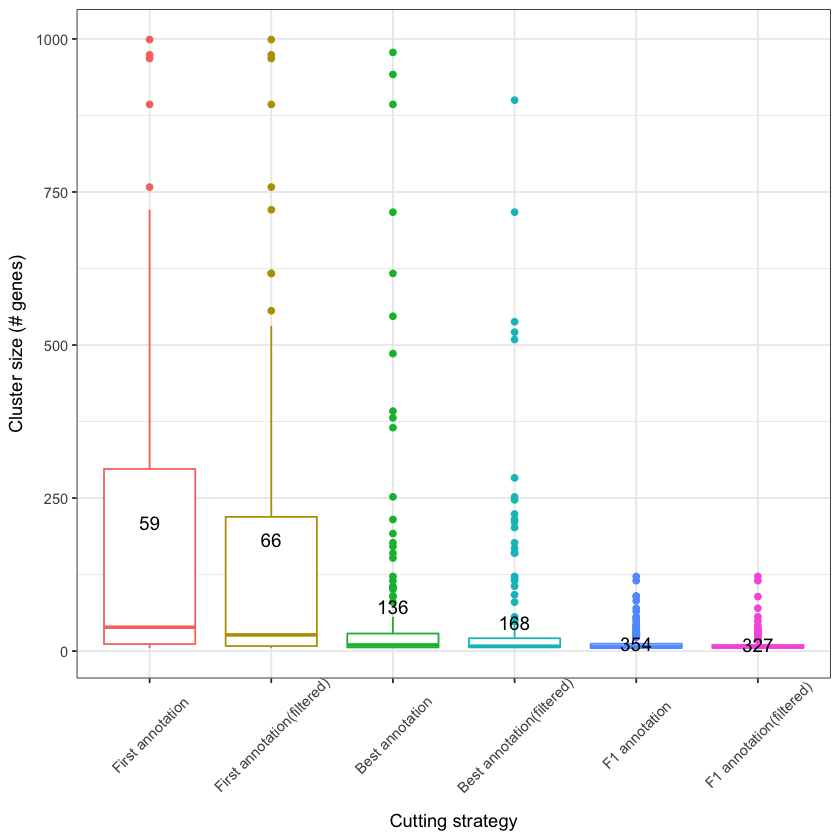

In [46]:
stats.tot %>% select(query.number, method, size) %>% group_by(method) %>% unique() -> cl.sizes
cl.sizes$method = as.factor(cl.sizes$method)
cl.sizes$method = factor(cl.sizes$method, levels=levels(cl.sizes$method)[c(5,6,1,2,3,4)])
give.n <- function(x){
   return(c(y = mean(x), label = length(x)))
}

ggplot(cl.sizes, aes(y=size, x=method, col=method)) + geom_boxplot() + theme_bw() + xlab("Cutting strategy") + ylab("Cluster size (# genes)") + stat_summary(fun.data = give.n, geom = "text", col="black", size=4) + theme(legend.position="none") + theme(axis.text.x = element_text(angle=45, hjust=0.5, vjust=0.6))
ggsave("CLEANtotal_cl_sizes_Fig9.pdf", dpi=600, units="mm", width=178)

Saving 178 x 178 mm image


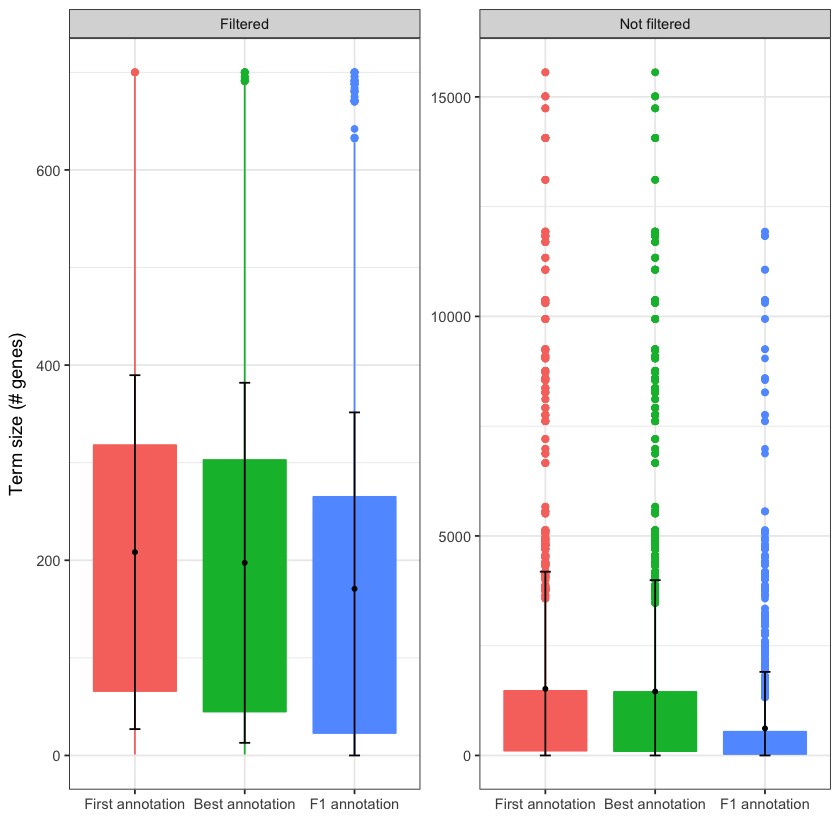

In [48]:
# Term sizes
stats.tot %>% select(query.number,method, term.size) %>% group_by(method) -> term.sizes

term.sizes$group <- unlist(lapply(term.sizes$method, function(x) ifelse(length(grep("filtered",x))>0,"Filtered","Not filtered")))
term.sizes$method <- gsub("\\(.*\\)", "",as.character(term.sizes$method))

term.sizes$method = as.factor(term.sizes$method)
term.sizes$method = factor(term.sizes$method, levels=levels(term.sizes$method)[c(3,1,2)])
data_summary <- function(x) {
   mu <- mean(x)
   sigma1 <- max(0,mu-sd(x))
   sigma2 <- mu+sd(x)
   return(c(y=mu,ymin=sigma1,ymax=sigma2))
}
ggplot(term.sizes, aes(x=method, y=term.size,fill=method, col=method)) + geom_boxplot() + facet_wrap(~group, scale="free_y") + theme_bw() + xlab(" ") + ylab("Term size (# genes)") + stat_summary(fun.data = data_summary,geom="errorbar", col="black", width=0.1) + stat_summary(fun.y = "mean",col="black", size=1,geom = "point") + theme(legend.position="none")
ggsave("CLEANtotal_term_sizes_Fig10.pdf", dpi=600, units="mm", width=178)

#### CLEANtotal unique functions

In [52]:
stats.tot %>% group_by(method) %>% distinct(query.number, size, method) %>% mutate(nr_clusters = length(unique(query.number)), min_size = min(size), mean_size = round(mean(size),2), max_size=max(size)) %>% select(method, nr_clusters, min_size, mean_size, max_size) %>% unique() -> uniq.tot
stats.tot %>% group_by(method) %>% dplyr::summarise(nr_annotations=length(term.id)) -> nr_terms
stats %>% group_by(method, term.id) %>% dplyr::summarise(count=n()) %>% filter(count==1) %>% group_by(method) %>% dplyr::summarise(uniq_annotations = n()) -> uniq_terms
uniq.tot = merge(uniq.tot, nr_terms, by="method")
uniq.tot = merge(uniq.tot, uniq_terms, by="method")
uniq.tot[["prop"]] = round(uniq.tot$uniq_annotations/uniq.tot$nr_annotations,2)
head(uniq.tot)

method,nr_clusters,min_size,mean_size,max_size,nr_annotations,uniq_annotations,prop
Best annotation,136,5,72.26,978,4083,649,0.16
Best annotation(filtered),168,5,46.20,900,2762,718,0.26
F1 annotation,354,5,12.12,122,3262,523,0.16
F1 annotation(filtered),327,5,10.78,122,2598,476,0.18
First annotation,59,5,209.47,999,3343,850,0.25
First annotation(filtered),66,5,181.80,999,2123,688,0.32


Saving 178 x 178 mm image


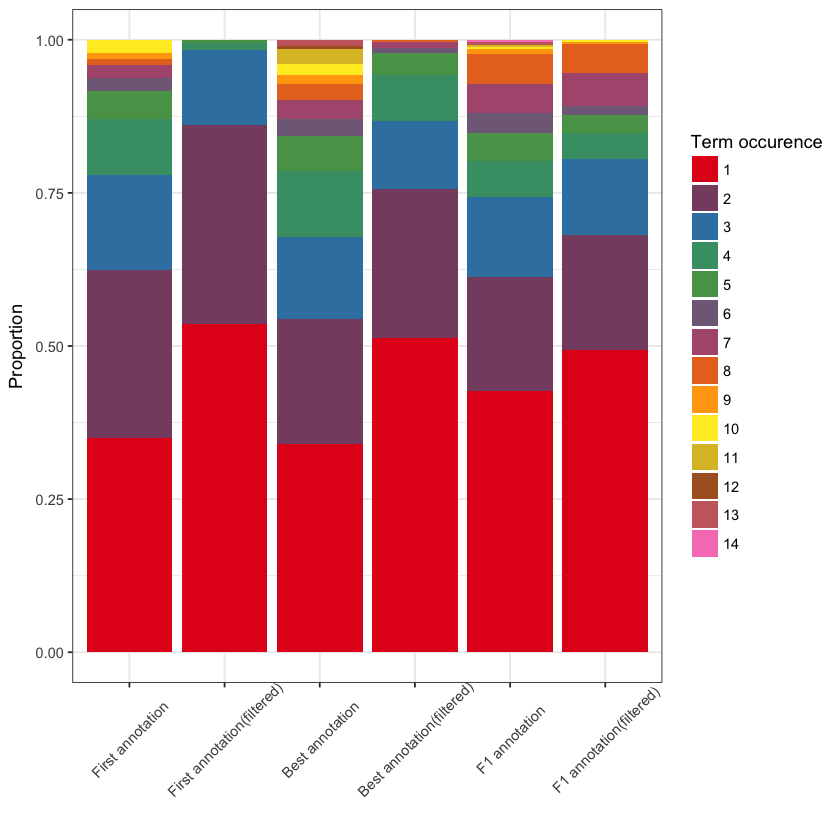

In [61]:
stats.tot %>% group_by(method, term.id) %>% dplyr::mutate(n=n()) %>% group_by(method, n) %>% dplyr::summarise(count = n()) -> count.tot
count.tot %>% group_by(method) %>% dplyr::mutate(prop=count/sum(count)) -> count.tot
count.tot$method = as.factor(count.tot$method)
count.tot$method = factor(count.tot$method, levels=levels(count.tot$method)[c(5,6,1,2,3,4)])
ggplot(count.tot, aes(x = method, y = prop, fill = as.factor(n))) + geom_bar(position = position_fill(reverse = TRUE), stat = 'identity') + theme_bw() + theme(axis.text.x = element_text(angle=45, hjust=0.5, vjust=0.6)) + ylab("Proportion") +xlab(" ") + scale_fill_manual(name="Term occurence", values = colorRampPalette(brewer.pal(8, "Set1"))(14))
ggsave("CLEANtotal_unique_Fig12.pdf", dpi=600, units="mm", width=178)

## Compare CLEANtotal and CLEANsmall

In [63]:
gp.tot.filt %>% 
  dplyr::select(query.number, term.id, term.name, domain, term.size, overlap.size, p.value, size, log10) %>%
  dplyr::filter(query.number %in% best.tot.filt) %>% arrange(p.value) %>% group_by(query.number) -> CLEANtotal_res

gp.small.filt %>% dplyr::select(query.number, term.id, term.name, domain, term.size, overlap.size, p.value, size, log10) %>% filter(query.number %in% best.sm.filt) %>% arrange(p.value) %>% group_by(query.number) -> CLEANsmall_res

In [64]:
CLEANsmall_res %>% group_by(query.number) %>% slice(which.max(log10)) %>% dplyr::select(query.number, domain, term.id, term.name, term.size, overlap.size, size, p.value) %>% arrange(p.value) %>% data.frame -> CLEANsmall
names(CLEANsmall) <- c("ID", "Domain", "Term.ID", "Term.name", "Term.size", "Overlap", "Cluster size", "P-value")
CLEANsmall$ID <- unlist(lapply(CLEANsmall$ID, function(x) strsplit(x, "_")[[1]][2]))
# Print out the results in latex
#xtable(CLEANsmall, type = "latex")

In [65]:
CLEANtotal_res %>% group_by(query.number) %>% slice(which.max(log10)) %>% dplyr::select(query.number, domain, term.id, term.name, term.size, overlap.size, size, p.value) %>% arrange(p.value) %>% data.frame -> CLEANtotal
names(CLEANtotal) <- c("ID", "Domain", "Term.ID", "Term.name", "Term.size", "Overlap", "Cluster size", "P-value")
CLEANtotal$ID <- unlist(lapply(CLEANtotal$ID, function(x) strsplit(x, "_")[[1]][2]))

# Save the results to excel
#write.xlsx(x = CLEANtotal, file = "../data/CLEANtotal.xlsx",
#        sheetName = "CLEANtotal_Best", row.names = FALSE)

#### CLEANsmall clusters detected in CLEANtotal data with Best annotation strategy

For every best cluster in CLEANsmall find the cluster in CLEANtotal with biggest overlap in functions.

In [66]:
wrapper <- function(df) {
  df  %>% select(query.number, term.id) %>% as.data.frame %>% list %>% return
}

y1 <- CLEANsmall_res %>% group_by(query.number) %>% dplyr::do(res = wrapper(.)) 
y2 <- CLEANtotal_res %>% group_by(query.number) %>% dplyr::do(res = wrapper(.))
# and now assign IDs (since we can't do that inside dplyr easily)
ids1 = y1$query.number
CLEANsmall_res.1 = lapply(y1$res, function(x) x[[1]])
names(CLEANsmall_res.1) = ids1
CLEANsmall_res.1 = lapply(CLEANsmall_res.1, function(x) x$term.id)

ids2 = y2$query.number
CLEANtotal_res.1 = lapply(y2$res, function(x) x[[1]])
names(CLEANtotal_res.1) = ids2
CLEANtotal_res.1 = lapply(CLEANtotal_res.1, function(x) x$term.id)

comp.res = data.frame()
for(cl in names(CLEANsmall_res.1)){
  # find overlap of terms
  olaps = lapply(CLEANtotal_res.1, function(x) length(intersect(CLEANsmall_res.1[[cl]], x)))
  idx = which.max(olaps)
  comp.res[cl,"CLEANsmall ID"] = strsplit(cl, "_")[[1]][2]
  comp.res[cl,"CLEANtotal ID"] = strsplit(names(idx), "_")[[1]][2]
  comp.res[cl, "CLEANsmall size"] = CLEANsmall[CLEANsmall$ID==strsplit(cl, "_")[[1]][2], "Cluster size"]
  comp.res[cl, "CLEANtotal size"] = CLEANtotal[CLEANtotal$ID==strsplit(names(idx), "_")[[1]][2], "Cluster size"]
  comp.res[cl, "Term"] = CLEANtotal[CLEANtotal$ID==strsplit(names(idx), "_")[[1]][2], "Term.name"]
  #comp.res[cl, "Overlap"] = olaps[[idx]]
  comp.res[cl, "Overlap %"] = olaps[[idx]]/length(CLEANsmall_res.1[[cl]])*100
}
# Remove zero overlap rows
comp.res = comp.res[comp.res$Overlap>0,]
comp.res = comp.res[paste("NODE_",CLEANsmall$ID, sep="")[1:10],]
row.names(comp.res) <- NULL

In [67]:
# Print out the results
#xtable(comp.res, type = "latex")
head(comp.res)

CLEANsmall ID,CLEANtotal ID,CLEANsmall size,CLEANtotal size,Term,Overlap %
56,12390,478,900,G-protein coupled receptor activity,38.01653
267,7794,131,283,lymphocyte activation,87.85714
26,10236,480,168,chromosome segregation,59.55882
45,1093,81,717,circulatory system development,59.37500
183,7794,5,283,lymphocyte activation,90.00000
34,1093,81,717,circulatory system development,67.64706
